In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Financial Digital Transactions

In [2]:
financial_digital_df = pd.read_excel('./data/dataset/FINANCIAL DIGITAL TXNS_PJDSC.xlsx')
financial_digital_df.head()

,CUST_NUM,AMOUNT,DATE_AND_TIME,CHANNEL,TRAN_TYPE
0,4418.325475,2000.885936,2023-04-01 07:55:10,MOBILE,E-WALLET
1,4418.325475,2000.407658,2023-04-01 07:54:01,MOBILE,E-WALLET
2,4418.325475,9829.356544,2023-04-14 11:04:20,MOBILE,BILLS PAYMENT
3,7356.780546,2000.575996,2023-04-11 09:41:43,MOBILE,E-WALLET
4,10768.575579,100.667732,2023-04-02 20:36:51,WEB,E-WALLET


In [3]:
financial_digital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174613 entries, 0 to 174612
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CUST_NUM       174613 non-null  float64       
 1   AMOUNT         174613 non-null  float64       
 2   DATE_AND_TIME  174613 non-null  datetime64[ns]
 3   CHANNEL        174613 non-null  object        
 4   TRAN_TYPE      174613 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 6.7+ MB


So far so good! No null values yet.

In [4]:
financial_digital_df.describe(include='all')

,CUST_NUM,AMOUNT,DATE_AND_TIME,CHANNEL,TRAN_TYPE
count,174613.000000,1.746130e+05,174613,174613,174613
unique,NaN,NaN,NaN,4,3
top,NaN,NaN,NaN,WEB,E-WALLET
freq,NaN,NaN,NaN,94994,139581
mean,9480.347450,3.383496e+03,2023-05-17 00:30:03.782238208,NaN,NaN
min,107.814656,0.000000e+00,2023-04-01 00:06:39,NaN,NaN
25%,7084.895341,4.066369e+02,2023-04-25 14:52:07,NaN,NaN
50%,10088.303326,1.000800e+03,2023-05-16 11:39:59,NaN,NaN
75%,12255.857538,3.000917e+03,2023-06-08 07:08:17,NaN,NaN
max,14141.980201,1.200000e+06,2023-06-30 23:58:22,NaN,NaN


As we can see, the `DATE_AND_TIME` feature is a combination of year, month, day, and time components. We break this down first so that all features are atomic in nature. Note that we are only dealing with the year 2023 so this might not be influential for now and only create three new features: `MONTH`, `DAY`, and `TIME`.

In [5]:
financial_digital_df['MONTH'] = financial_digital_df['DATE_AND_TIME'].dt.month
financial_digital_df['DAY'] = financial_digital_df['DATE_AND_TIME'].dt.day
financial_digital_df['TIME'] = financial_digital_df['DATE_AND_TIME'].dt.time

In [6]:
financial_digital_df.drop(labels=['DATE_AND_TIME'], axis=1, inplace=True)

In [7]:
financial_digital_df.head()

,CUST_NUM,AMOUNT,CHANNEL,TRAN_TYPE,MONTH,DAY,TIME
0,4418.325475,2000.885936,MOBILE,E-WALLET,4,1,07:55:10
1,4418.325475,2000.407658,MOBILE,E-WALLET,4,1,07:54:01
2,4418.325475,9829.356544,MOBILE,BILLS PAYMENT,4,14,11:04:20
3,7356.780546,2000.575996,MOBILE,E-WALLET,4,11,09:41:43
4,10768.575579,100.667732,WEB,E-WALLET,4,2,20:36:51


# Feature Preprocessing

We transform each categorical value into its numerical counterparts. Since there is no ordering imposed between each values from the `CHANNEL` and `TRAN_TYPE` features, we utilize the `factorize()` method to map each value into its corresponding numerical counterpart.

## Channel

In [8]:
financial_digital_df['CHANNEL'].unique()

array(['MOBILE', 'WEB', 'OPEN BANKING', 'BEAMS'], dtype=object)

In [9]:
financial_digital_df['CHANNEL'], channel_uniques = financial_digital_df['CHANNEL'].factorize()

In [10]:
financial_digital_df.head()

,CUST_NUM,AMOUNT,CHANNEL,TRAN_TYPE,MONTH,DAY,TIME
0,4418.325475,2000.885936,0,E-WALLET,4,1,07:55:10
1,4418.325475,2000.407658,0,E-WALLET,4,1,07:54:01
2,4418.325475,9829.356544,0,BILLS PAYMENT,4,14,11:04:20
3,7356.780546,2000.575996,0,E-WALLET,4,11,09:41:43
4,10768.575579,100.667732,1,E-WALLET,4,2,20:36:51


In [11]:
channel_uniques

Index(['MOBILE', 'WEB', 'OPEN BANKING', 'BEAMS'], dtype='object')

## Transaction Type

In [12]:
financial_digital_df['TRAN_TYPE'].unique()

array(['E-WALLET', 'BILLS PAYMENT', 'INTERNAL FUNDS TRANSFER'],
      dtype=object)

In [13]:
financial_digital_df['TRAN_TYPE'], trantype_uniques = financial_digital_df['TRAN_TYPE'].factorize()

In [14]:
trantype_uniques

Index(['E-WALLET', 'BILLS PAYMENT', 'INTERNAL FUNDS TRANSFER'], dtype='object')

In [15]:
financial_digital_df.head()

,CUST_NUM,AMOUNT,CHANNEL,TRAN_TYPE,MONTH,DAY,TIME
0,4418.325475,2000.885936,0,0,4,1,07:55:10
1,4418.325475,2000.407658,0,0,4,1,07:54:01
2,4418.325475,9829.356544,0,1,4,14,11:04:20
3,7356.780546,2000.575996,0,0,4,11,09:41:43
4,10768.575579,100.667732,1,0,4,2,20:36:51


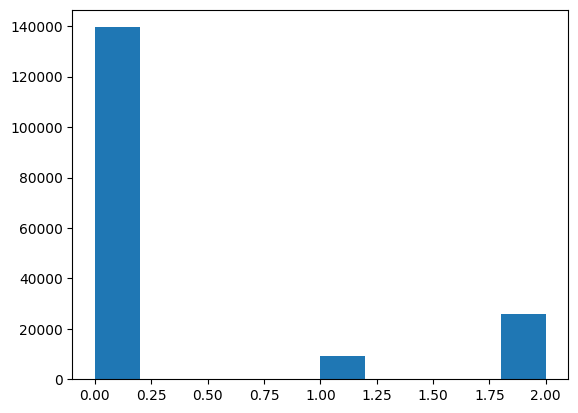

In [16]:
financial_digital_df['TRAN_TYPE'].hist()
plt.grid(False)
plt.show()

## Amount

We now check the boxplot for the `AMOUNT` feature and check for outliers. From the `describe()` operation above, we can see that the max value is way too far compared to the 75th percentile value.

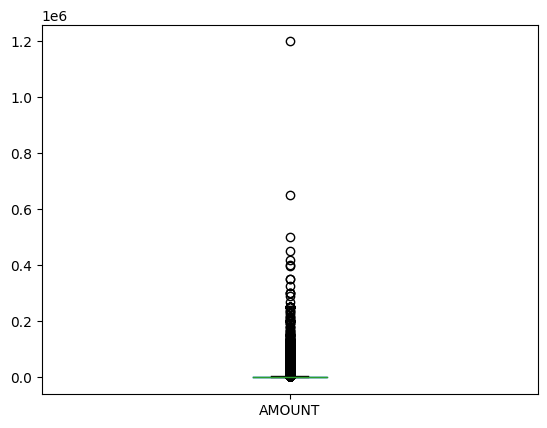

In [17]:
financial_digital_df.boxplot(column='AMOUNT')
plt.grid(False)
plt.show()

In [18]:
# z_scores = np.abs(stats.zscore(financial_digital_df['AMOUNT']))
# threshold = 3 # Default std outlier
# financial_digital_df = financial_digital_df[z_scores <= threshold]

In [19]:
# financial_digital_df['AMOUNT'].describe()

count    172437.000000
mean       2713.669277
std        4278.753026
min           0.000000
25%         400.846338
50%        1000.734595
75%        3000.616442
max       30600.773123
Name: AMOUNT, dtype: float64

# Heuristics

We check if there are invalid dates inputted.

In [20]:
financial_digital_df[financial_digital_df['MONTH'] == 4]['DAY'].unique()

array([ 1, 14, 11,  2,  9, 10, 13, 17, 30, 29, 20, 27,  8,  3,  5, 16, 21,
       23, 26, 15, 28,  7,  6, 18, 24, 25, 12, 19,  4, 22])

In [21]:
financial_digital_df[financial_digital_df['MONTH'] == 5]['DAY'].unique()

array([ 1, 13, 17, 31,  7, 20, 24, 26, 15, 16,  2,  8, 22,  4,  5, 12, 19,
       21, 28, 25, 29, 23,  3, 30,  9, 11, 14, 18,  6, 10, 27])

In [22]:
financial_digital_df[financial_digital_df['MONTH'] == 6]['DAY'].unique()

array([14, 29,  8,  2, 19, 27,  3,  4,  5,  9, 21, 22, 25, 26,  6, 11, 16,
       12, 24, 30, 28, 10,  7, 15, 18,  1, 20, 13, 17, 23])

So far so good.

In [18]:
customer_info_df = pd.read_csv('./CUSTOMER_INFO_CLEANED.csv')
customer_info_df.head()

,Unnamed: 0,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,GENDER,MARITAL_STATUS
0,0,11712.654012,0,0,1.0,20.0,1.833333,0,0,0,0,0
1,1,436.605085,0,0,1.0,21.0,4.250000,0,1,1,1,0
2,2,921.989154,0,0,1.0,23.0,2.000000,0,2,0,0,0
3,3,1119.634762,0,0,0.0,13.0,5.583333,0,2,0,0,0
4,4,1709.755538,0,0,1.0,20.0,1.250000,0,0,1,1,0


In [21]:
region_mapper = customer_info_df[['CUST_NUM','REGION']]
region_mapper.set_index('CUST_NUM', inplace=True)